# Predicting Medical Insurance Cost

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, r2_score, mean_squared_error



In [75]:
df=pd.read_csv("/content/sample_data/insurance (1).csv")

#Data understanding

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The minimum age is 18 and the maximum age is 64.

The maximum charge value is 63.770 which might be an unusual value. It can be investigated in the data visualization part.

In [7]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


The most frequent value for sex is male.

The most frequent region is southeast.

Most people are non smokers.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in the dataset.

#Data Cleaning

Data will be checked for:

Missing Values

Duplicated Values

Consistent Data Type

The purpose of data cleaning is to get our data ready to analyze and visualize.

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


There are no missing values in this dataset.

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dataset has only one duplicated observation. This row need to be dropped.

In [11]:
df.drop_duplicates(keep ='first', inplace = True)

#Data Visualization

Goal is to perform univariate, bivariate and multivariate analysis to see the distribution and relationship between variables.

Univariate Analysis

The purpose of the univariate analysis is to understand the distribution of values for a single variable.

We can perform univariate analysis with 3 options :

Summary Statistics
Frequency Distributions Table
Charts ( Boxplot, Histogram, Barplot, Pie Chart)
We will perform univariate analysis by using visualization techniques.

Univariate Analysis for Numerical Features

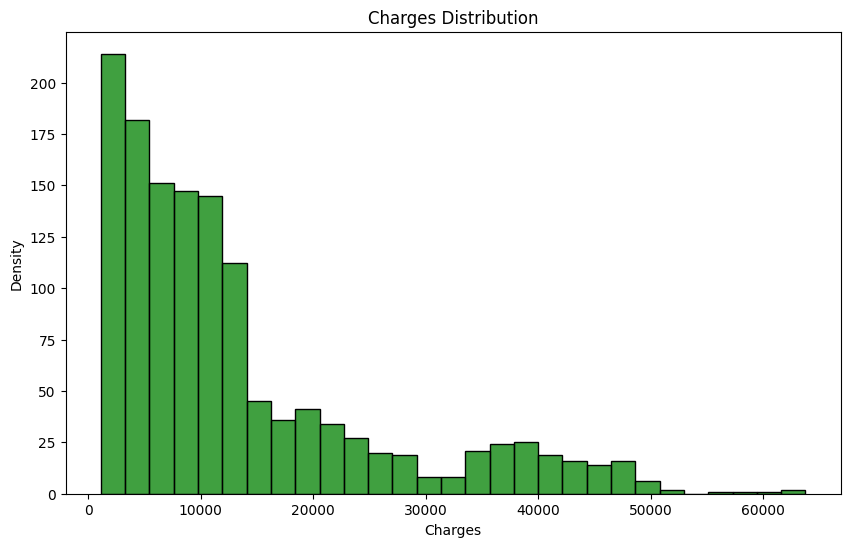

In [12]:
##Charges

plt.figure(figsize=(10,6))
sns.histplot(df.charges,color='g')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.show()

Data looks like the right(positive) skewed. Most of the charges are between 0 – 10000 dollars.

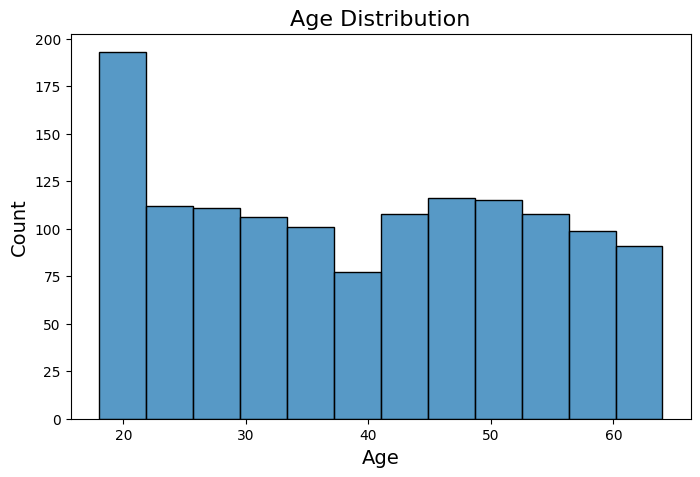

In [13]:
## Age

plt.figure(figsize=(8,5))
sns.histplot(df.age)
plt.title('Age Distribution',size=16)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

Most of the customers are 18–19 years old. The distribution looks like a uniform distribution.

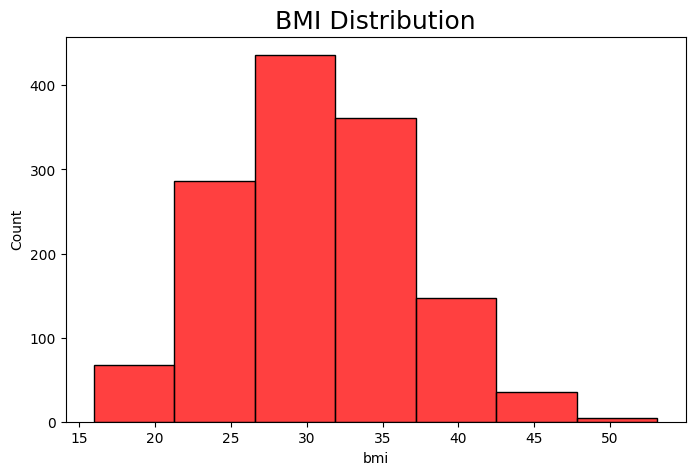

In [14]:
## BMI

plt.figure(figsize = (8,5))
sns.histplot(df.bmi,bins=7,color= 'r')
plt.title("BMI Distribution", size=18)
plt.show()


BMI of people seems like a normal distribution.

Most people have BMI between 27-32.

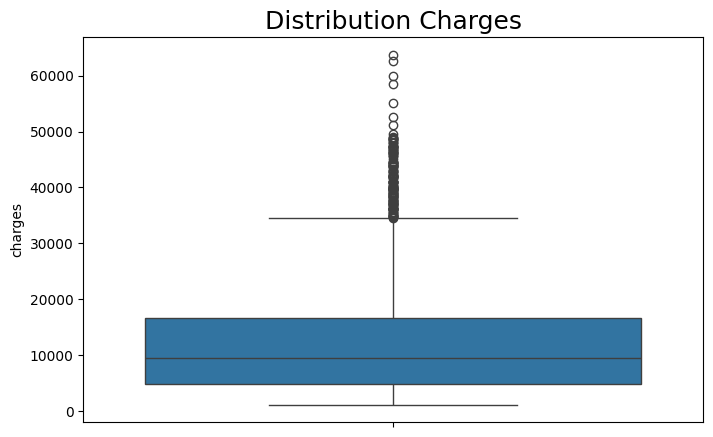

In [15]:
## Boxplot for Charges

plt.figure(figsize = (8,5))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

The box plot shows that the data is skewed to the right, with a significant number of high-value outliers.

The presence of many outliers suggests that while most of the data is within the 7,000 to 17,000 range, there are several unusually high charges.



#Univariate Analysis having multiple variables

For Categorical Features

A bar chart is commonly used to visualize categorical features.

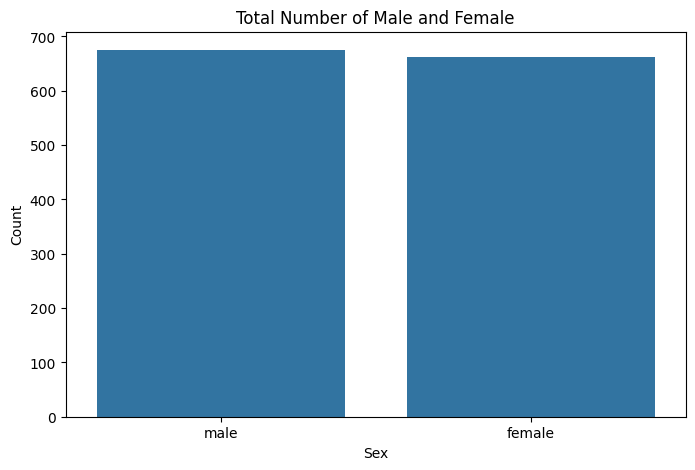

In [16]:
sex_counts=df.sex.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Total Number of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

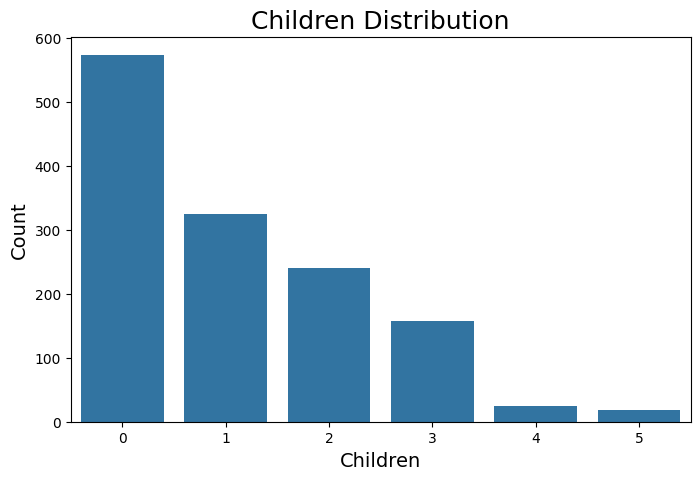

In [17]:
##Children


child_counts = df.children.value_counts()

# Create a bar plot of the child counts
plt.figure(figsize=(8, 5))
sns.barplot(x=child_counts.index, y=child_counts.values)
plt.title('Children Distribution', size=18)
plt.xlabel('Children', size=14)
plt.ylabel('Count', size=14)
plt.show()

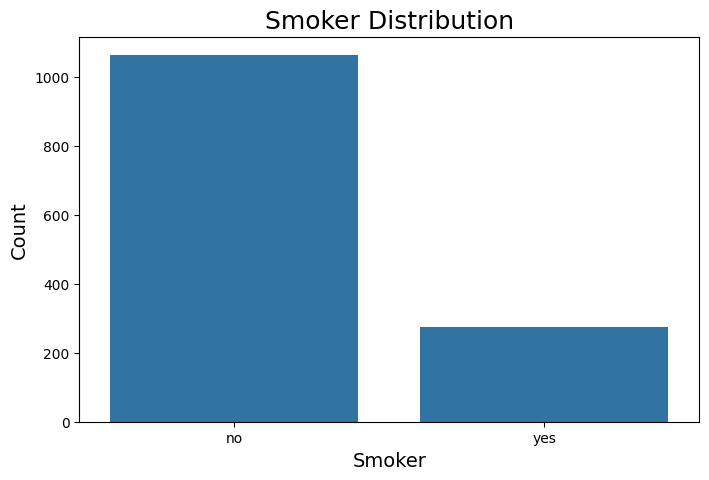

In [18]:
## Smoker

smoker_count = df.smoker.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=smoker_count.index, y=smoker_count.values)
plt.title('Smoker Distribution', size=18)
plt.xlabel('Smoker', size=14)
plt.ylabel('Count', size=14)
plt.show()

Text(0.5, 1.0, 'Region Distribution')

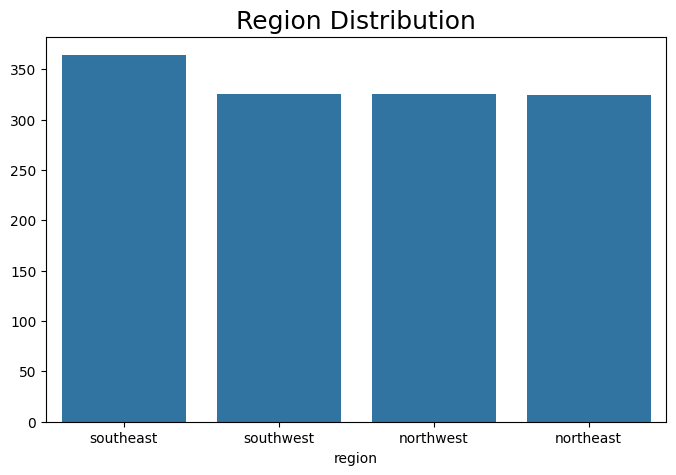

In [78]:
#Region

region_count= df.region.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=region_count.index, y=region_count.values)
plt.title('Region Distribution', size=18)

# One hot encoding of categorical variables

In [20]:
Nominal_columns = ['sex', 'smoker', 'region','children']

In [21]:
df_encoded = pd.get_dummies(df, columns=Nominal_columns, dtype='int')

In [22]:
df_encoded.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,18,33.770,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,28,33.000,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,0


## Bivariate analysis with Correlation Analysis

In [23]:
df_encoded.columns

Index(['age', 'bmi', 'charges', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5'],
      dtype='object')

In [24]:
Corr_columns = ['age', 'bmi','sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5']

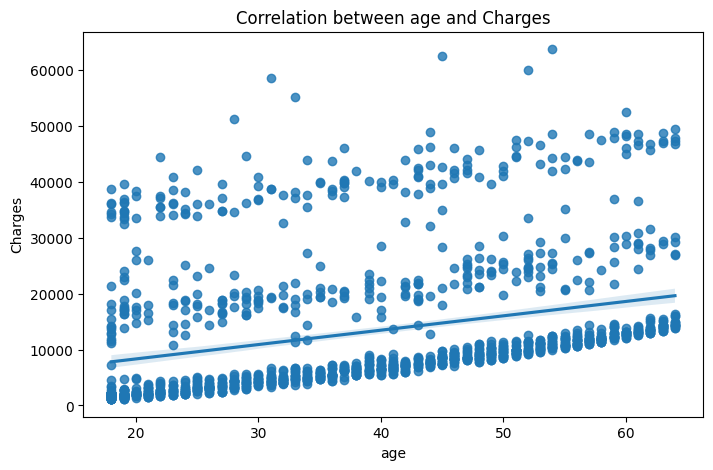

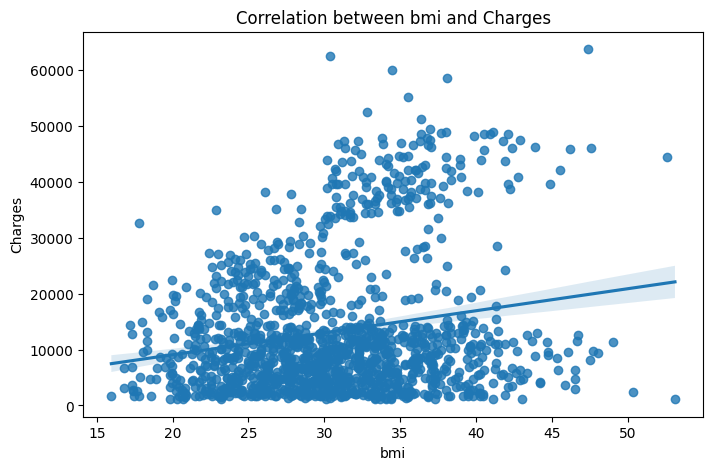

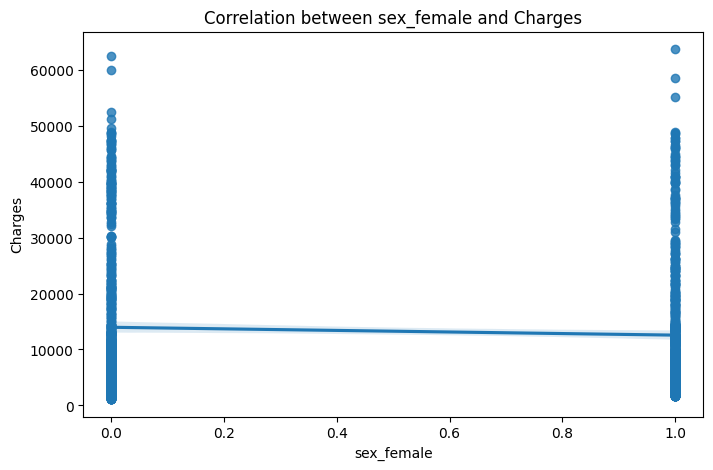

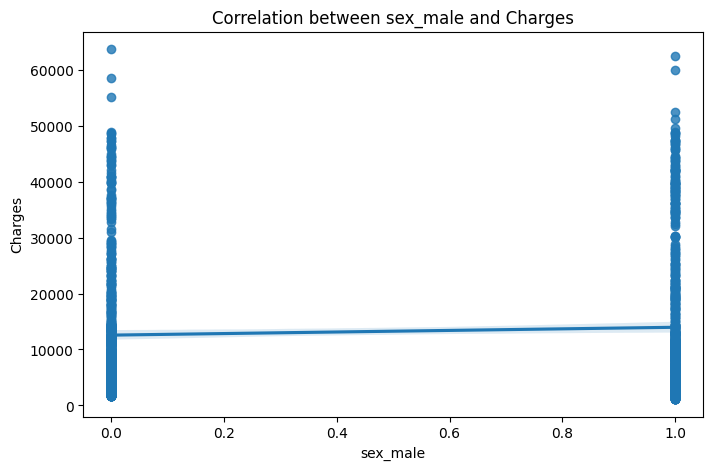

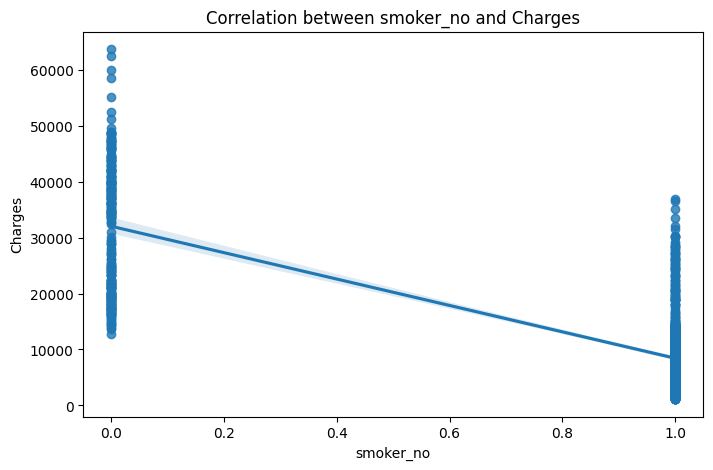

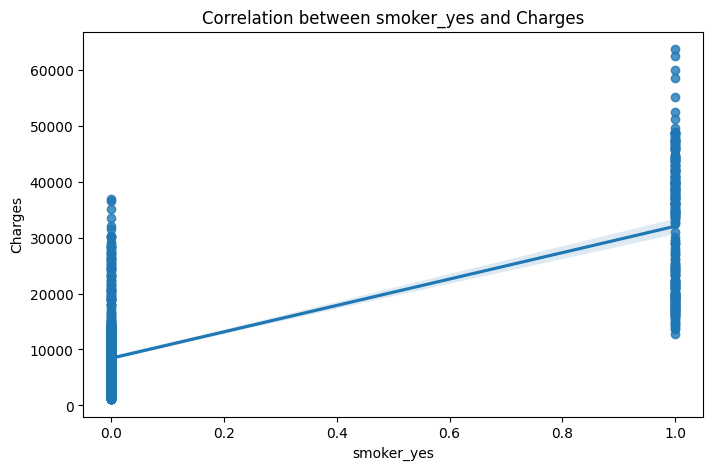

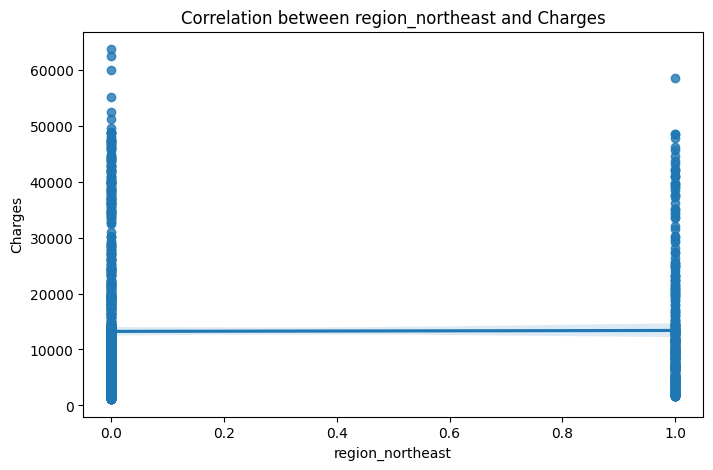

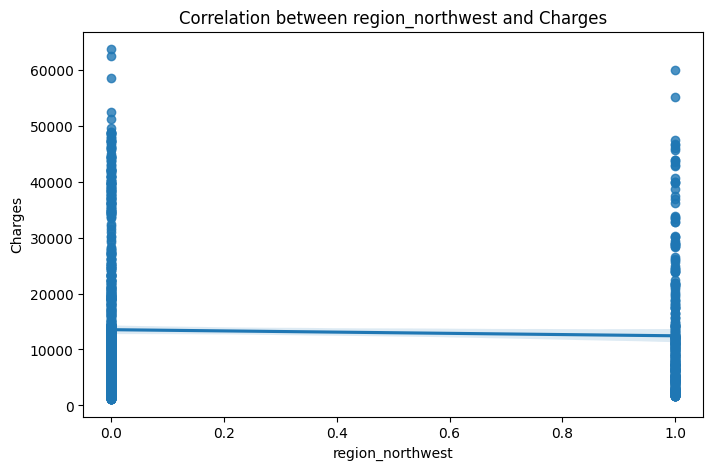

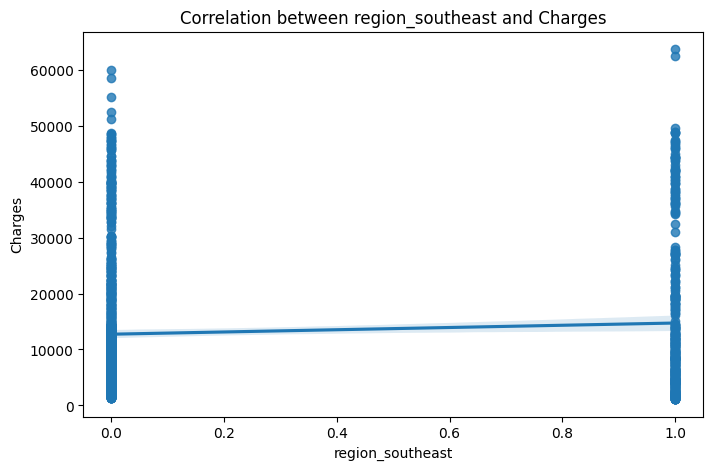

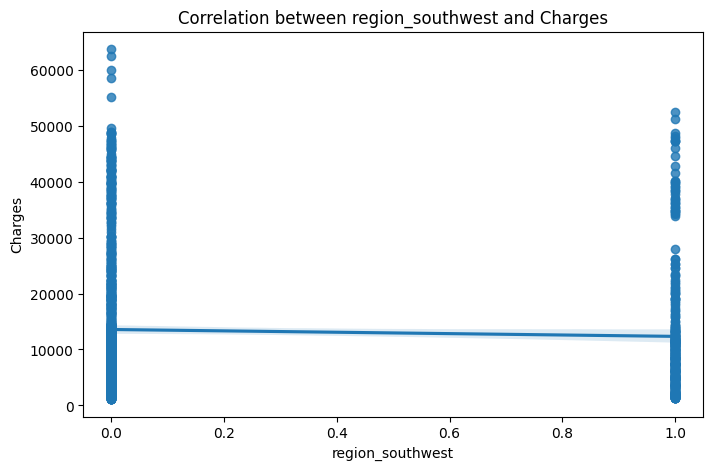

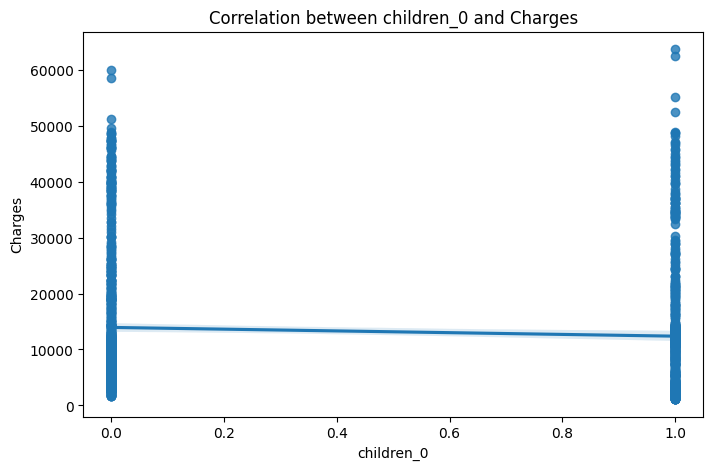

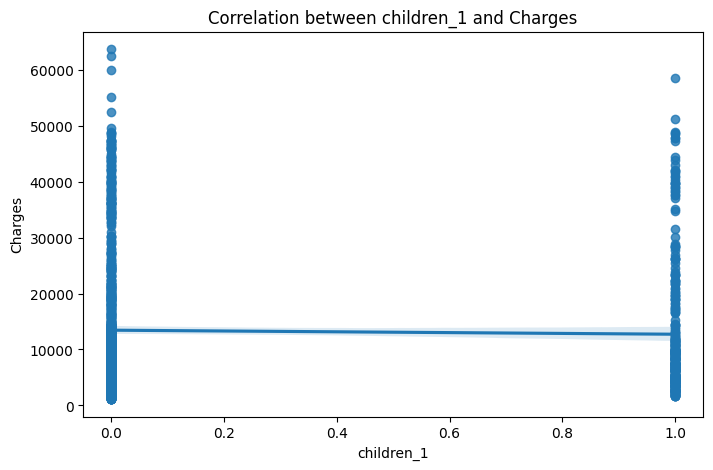

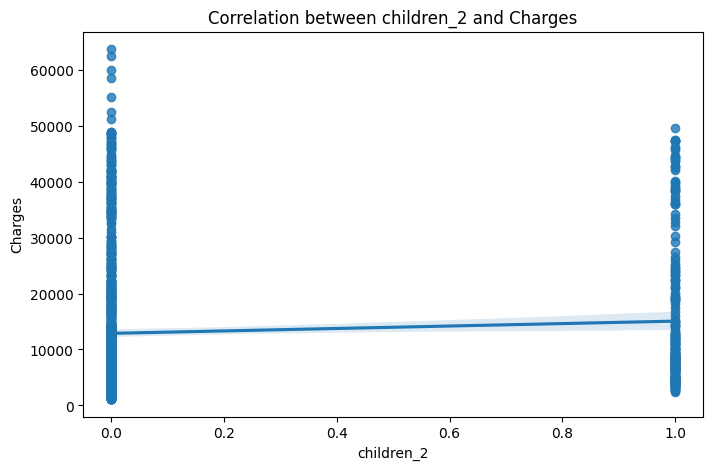

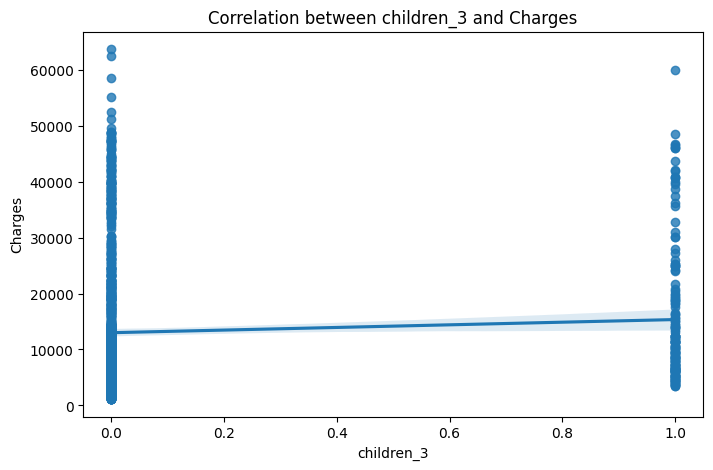

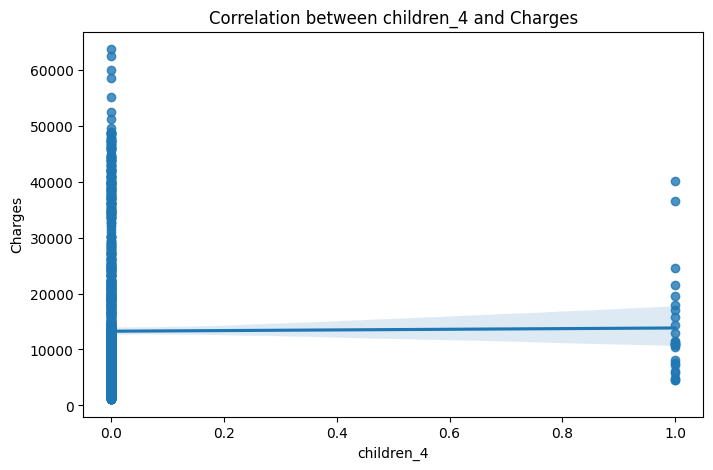

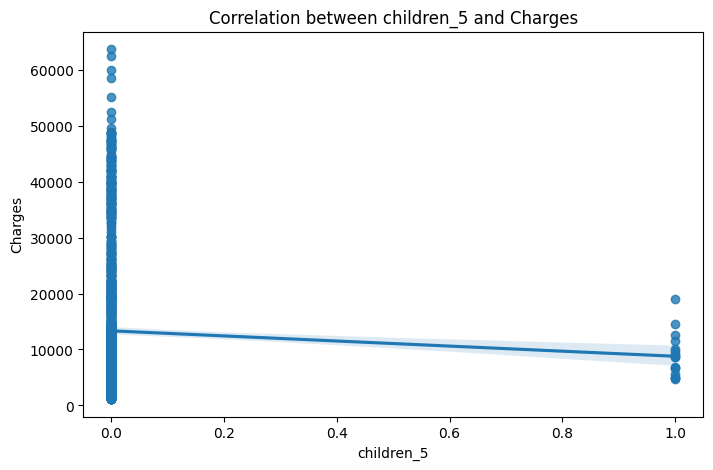

In [25]:
for i in Corr_columns:
  plt.figure(figsize=(8,5))
  sns.regplot(x=df_encoded[i], y=df_encoded['charges'])
  plt.title(f'Correlation between {i} and Charges')
  plt.xlabel(i)
  plt.ylabel('Charges')
  plt.show()

In [26]:
correlation_matrix=df_encoded.corr()

In [27]:
correlations_with_dependent_variable = correlation_matrix['charges']
print(correlations_with_dependent_variable)

age                 0.298308
bmi                 0.198401
charges             1.000000
sex_female         -0.058044
sex_male            0.058044
smoker_no          -0.787234
smoker_yes          0.787234
region_northeast    0.005945
region_northwest   -0.038695
region_southeast    0.073578
region_southwest   -0.043637
children_0         -0.063985
children_1         -0.025598
children_2          0.069333
children_3          0.062558
children_4          0.006517
children_5         -0.043357
Name: charges, dtype: float64


Correlation Coefficient: The correlation coefficient ranges from -1 to 1.

1 indicates a perfect positive relationship.

-1 indicates a perfect negative relationship.

0 indicates no relationship.

# Insights

Being a smoker significantly increases charges (strong correlation).

Age and BMI have a moderate positive correlation with charges.

Gender, region, and the number of children have weak or negligible correlations with charges.

# Multiple Linear Regression

In [39]:

# Considering the independent variables having strong and moderate correlation with independent variable

X= df_encoded[['age', 'bmi','smoker_no','smoker_yes']]
y=df_encoded['charges']



In [40]:
# Splitting the dataset into train and test set

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the Linear Regression model

regressor=LinearRegression()

In [42]:
# Fitting Multiple Linear Regression to the Training Set

regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
# Predicting the Test set results

yhat = regressor.predict(X_test)

In [45]:
# Calculating the R squared value
r2_score(y_test, yhat)


0.8049502474643171

# Polynomial Regression

In [58]:
#Transform Features to Polynomial Features

degree = 2
poly = PolynomialFeatures(degree=degree)

In [64]:
# Transform the Training Features

X_train_poly = poly.fit_transform(X_train)

In [65]:
# Transform the Testing Features

X_test_poly = poly.fit_transform(X_test)

In [66]:
# Train the model on the polynomial features

regressor.fit(X_train_poly, y_train)

LinearRegression()

In [67]:
# Make predictions on the Testing set

y_test_pred = regressor.predict(X_test_poly)

In [70]:
# Calculate Mean Squared Error (MSE) for the Testing set

mse_test = mean_squared_error(y_test, y_test_pred)
print(mse_test)

21400305.651702706


In [71]:
# Calculating the R squared value

r2_score(y_test, y_test_pred)

0.8835395949332249

An R² score of 0.88 means that polynomial regression model explains 88% of the variance in the dependent variable. This indicates that the model has a good fit to the data.